<a href="https://www.kaggle.com/code/mayurdevarajpatil/zomato?scriptVersionId=138434791" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
zomato=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')


In [3]:
df=zomato.copy()

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.drop(['menu_item','url','phone','address','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1,inplace=True)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [7]:
df.shape

(51717, 10)

In [8]:
df.duplicated().sum()

16706

In [9]:
df[df.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out
2482,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
2483,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
2488,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
...,...,...,...,...,...,...,...,...,...,...
51633,Re:fuel- Aloft Bengaluru Cessna Business Park,No,No,NaN,0,Bellandur,"Cafe, Bakery","Bakery, Beverages, Cafe, Coffee, Desserts, San...","1,000",Dine-out
51637,The Crunch,No,No,3.3 /5,6,Brookefield,Beverage Shop,Beverages,300,Dine-out
51639,Kale Cafe,No,No,NaN,0,Brookefield,Quick Bites,"Fast Food, Kerala",100,Dine-out
51642,Basaveshwara Khanavali,No,No,NaN,0,Brookefield,Quick Bites,South Indian,200,Dine-out


In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.shape

(35011, 10)

In [12]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           3770
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

In [13]:
df[df.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
51712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

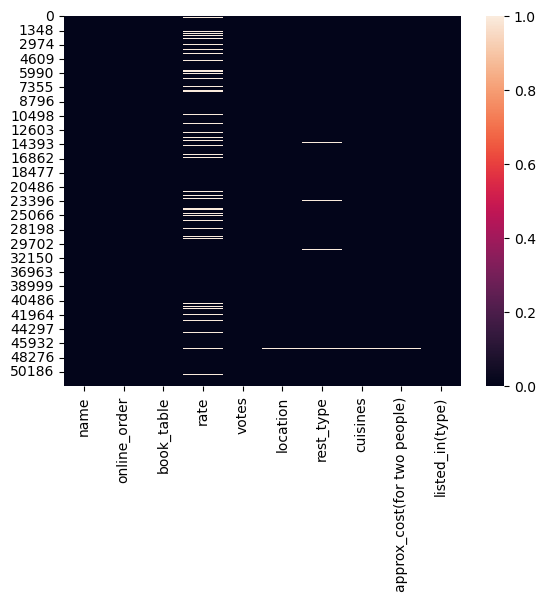

In [14]:
sns.heatmap(df.isnull())

In [15]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 35011, dtype: object

In [16]:
df['rate']=df['rate'].str.replace('/5','')

In [17]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
df['rate']=df['rate'].str.replace('NEW','nan')

In [19]:
df['rate']=df['rate'].str.replace('-','nan')

In [20]:
df['rate']=df['rate'].dropna()

In [21]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'nan', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [22]:
df.rate.astype(float)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35011, dtype: float64

In [23]:
df['rate']=df['rate'].fillna(df['rate'].median())

In [24]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [27]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'nan', '2.9', '3.5', 3.8,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         34636 non-null  object
 1   online_order                 34636 non-null  object
 2   book_table                   34636 non-null  object
 3   rate                         34636 non-null  object
 4   votes                        34636 non-null  int64 
 5   location                     34636 non-null  object
 6   rest_type                    34636 non-null  object
 7   cuisines                     34636 non-null  object
 8   approx_cost(for two people)  34636 non-null  object
 9   listed_in(type)              34636 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [29]:
df.rename(columns={'approx_cost(for two people)':'cost2plate','listed_in(type)':'Type'},inplace=True)

In [30]:
df.cost2plate.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [31]:
df['cost2plate']=df['cost2plate'].str.replace(',','').astype(float)

In [32]:
df.cost2plate.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34636 non-null  object 
 1   online_order  34636 non-null  object 
 2   book_table    34636 non-null  object 
 3   rate          34636 non-null  object 
 4   votes         34636 non-null  int64  
 5   location      34636 non-null  object 
 6   rest_type     34636 non-null  object 
 7   cuisines      34636 non-null  object 
 8   cost2plate    34636 non-null  float64
 9   Type          34636 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


In [34]:
df['rest_type'].value_counts()

Quick Bites                   12123
Casual Dining                  7533
Cafe                           2578
Delivery                       1502
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [35]:
df.rate=df.rate.astype(float)

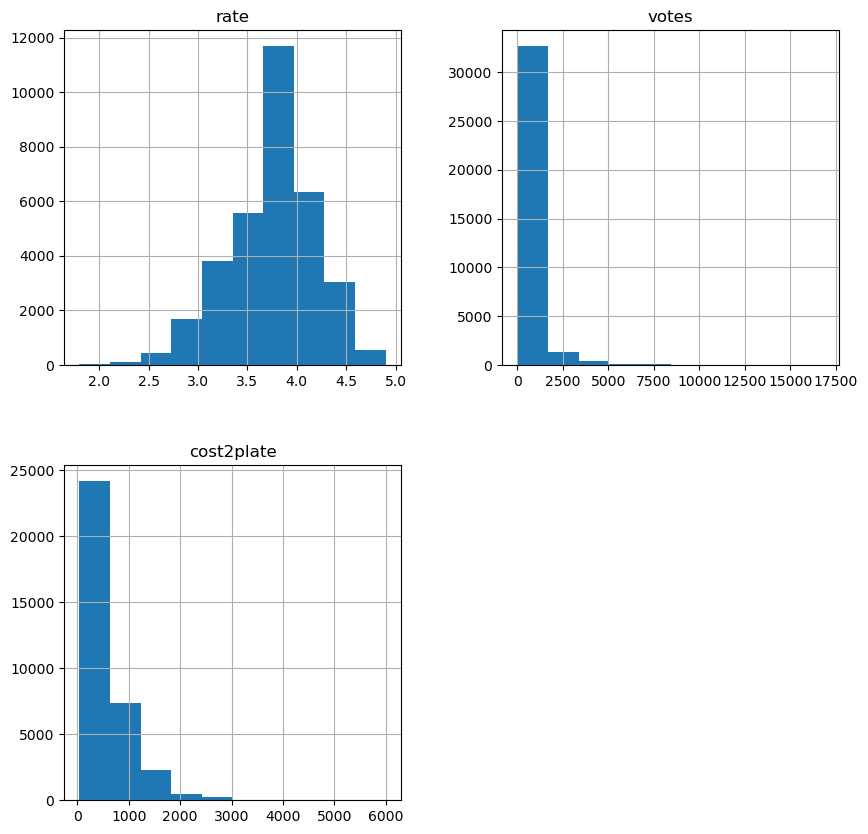

In [36]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34636 non-null  object 
 1   online_order  34636 non-null  object 
 2   book_table    34636 non-null  object 
 3   rate          33316 non-null  float64
 4   votes         34636 non-null  int64  
 5   location      34636 non-null  object 
 6   rest_type     34636 non-null  object 
 7   cuisines      34636 non-null  object 
 8   cost2plate    34636 non-null  float64
 9   Type          34636 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


In [38]:
df.online_order=df.online_order.astype('object')

<Axes: title={'center': 'Restaurants delivering Online or not'}, ylabel='online_order'>

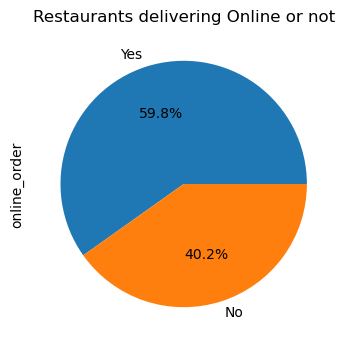

In [39]:
df.online_order.value_counts().plot(kind='pie',figsize=(5,4),autopct='%0.1f%%',title='Restaurants delivering Online or not')

<Axes: title={'center': 'Restaurants allowing table booking or not'}, ylabel='book_table'>

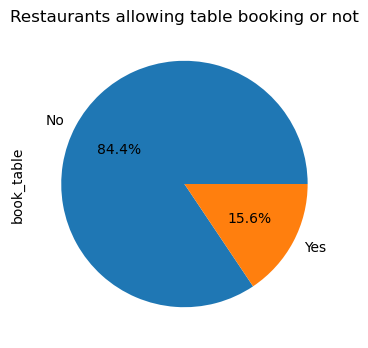

In [40]:
df.book_table.value_counts().plot(kind='pie',figsize=(5,4),autopct='%0.1f%%',title='Restaurants allowing table booking or not')

Table booking Rate vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

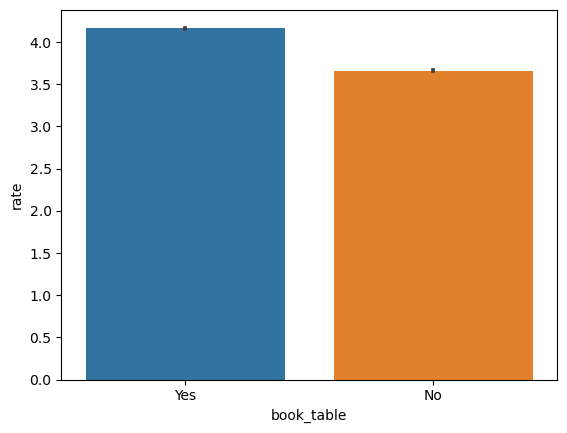

In [41]:
sns.barplot(x='book_table',y='rate',data=df)

<Axes: xlabel='location', ylabel='count'>

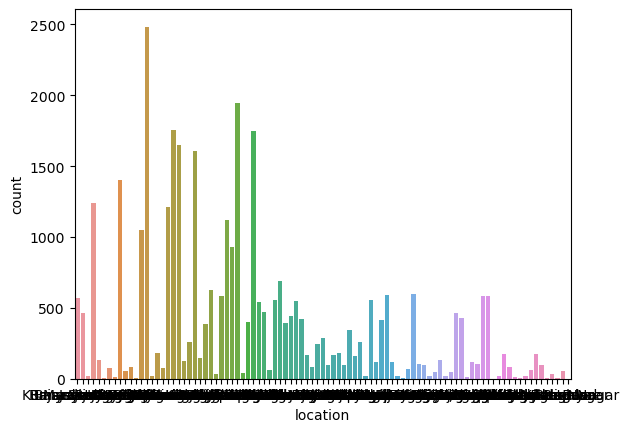

In [42]:
sns.countplot(x='location',data=df)


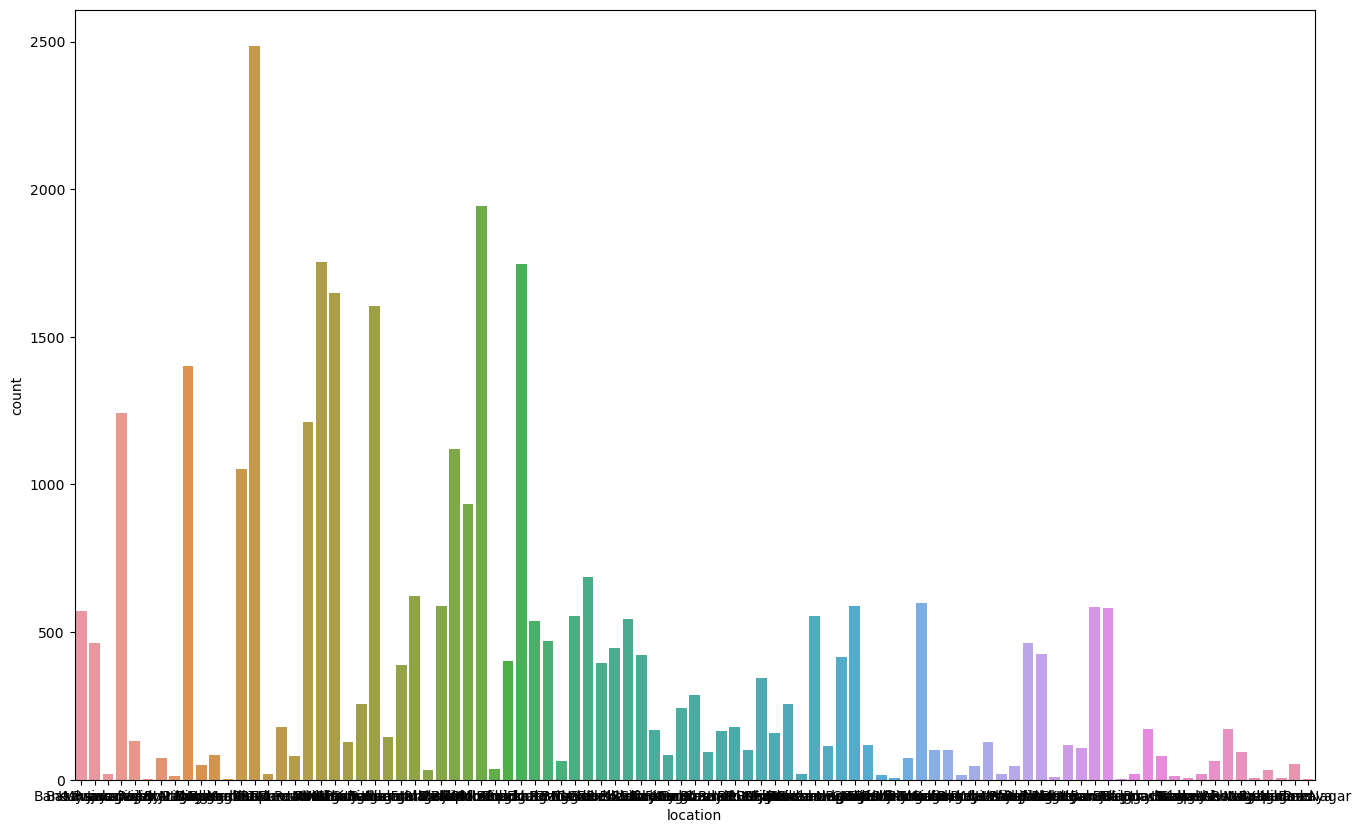

In [43]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df,x='location')


<Axes: xlabel='book_table', ylabel='count'>

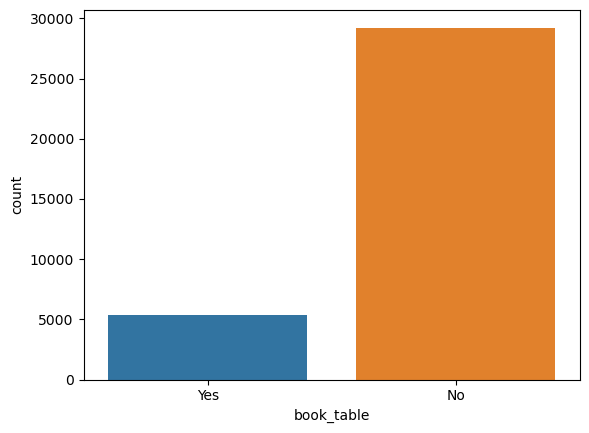

In [44]:
sns.countplot(x='book_table',data=df)

<Axes: xlabel='online_order', ylabel='count'>

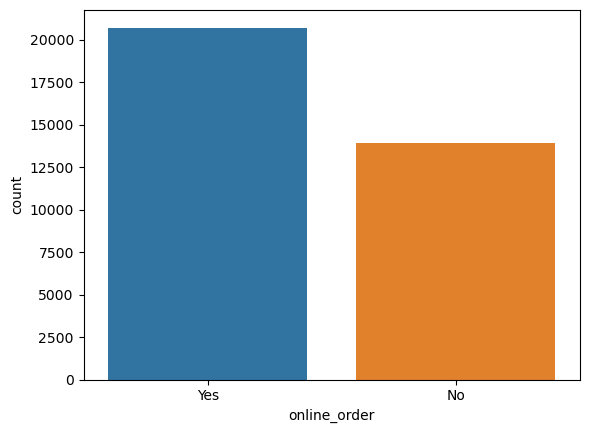

In [45]:
sns.countplot(x='online_order',data=df)

In [46]:
df1 = df.groupby(['location','online_order'])['name'].count().sort_values(ascending=False).nlargest(30)
df1.to_csv('location_online.csv')
# df1 = pd.read_csv('location_online.csv')
# df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1.index

MultiIndex([(                  'BTM', 'Yes'),
            (                  'HSR', 'Yes'),
            (          'Indiranagar', 'Yes'),
            (           'Whitefield', 'Yes'),
            ('Koramangala 5th Block', 'Yes'),
            (         'Marathahalli', 'Yes'),
            (           'Whitefield',  'No'),
            (            'Jayanagar', 'Yes'),
            (             'JP Nagar', 'Yes'),
            (                  'BTM',  'No'),
            (            'Bellandur', 'Yes'),
            (      'Electronic City',  'No'),
            (    'Bannerghatta Road', 'Yes'),
            (        'Sarjapur Road', 'Yes'),
            (          'Indiranagar',  'No'),
            (         'Marathahalli',  'No'),
            ('Koramangala 5th Block',  'No'),
            (             'JP Nagar',  'No'),
            (      'Electronic City', 'Yes'),
            (                  'HSR',  'No'),
            (            'Bellandur',  'No'),
            ('Koramangala 7th Bloc

<Axes: title={'center': 'location vs online order'}, xlabel='location,online_order'>

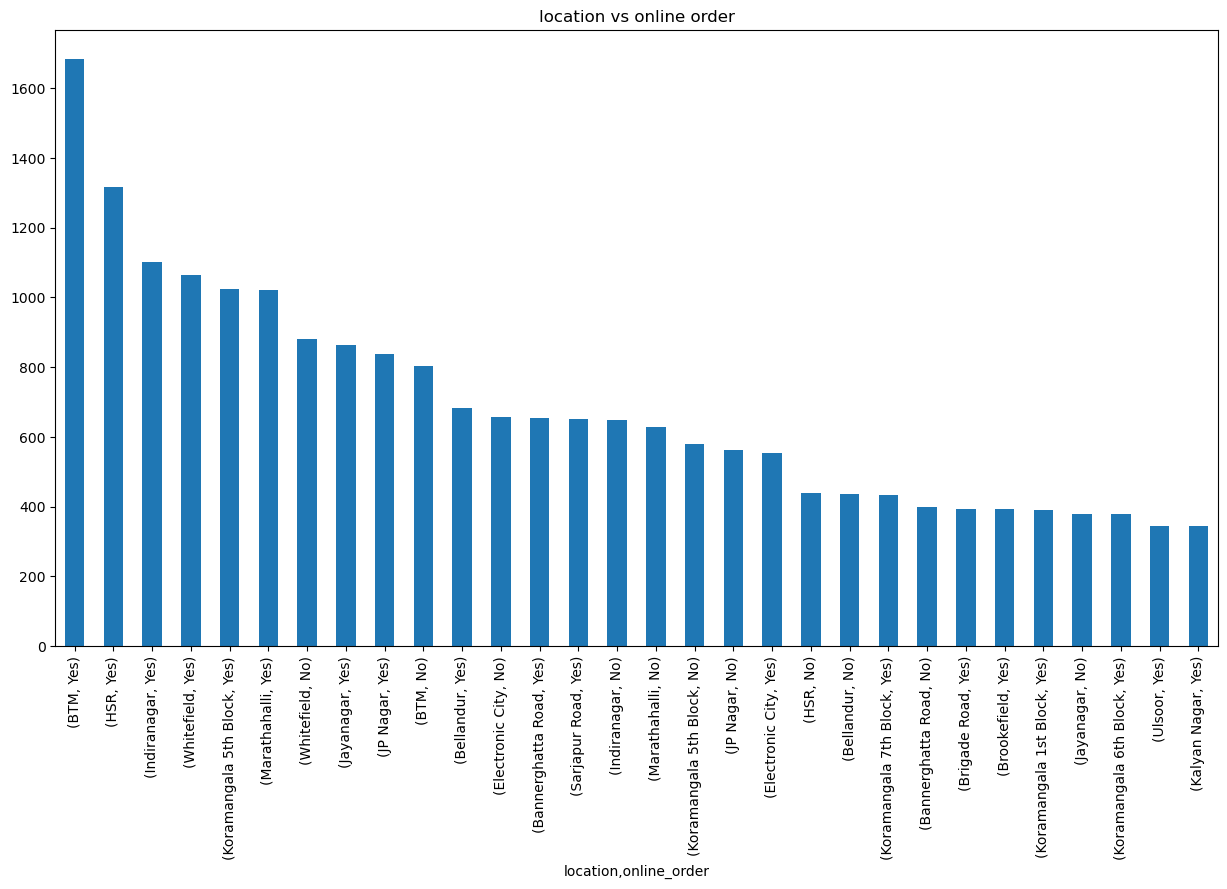

In [47]:
df1.plot(kind='bar',figsize = (15,8),title='location vs online order')

In [48]:
df2=df.groupby('location')['online_order'].value_counts()
# px.bar(df2)
df2

location       online_order
BTM            Yes             1682
               No               802
Banashankari   Yes              311
               No               260
Banaswadi      Yes              219
                               ... 
Wilson Garden  No                69
               Yes               59
Yelahanka      Yes                5
Yeshwantpur    Yes               72
               No                23
Name: online_order, Length: 181, dtype: int64

In [49]:
df['location'].value_counts()

BTM                     2484
Whitefield              1945
HSR                     1753
Indiranagar             1747
Marathahalli            1649
                        ... 
Yelahanka                  5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [50]:
df[df.location.isin(df.location.value_counts()[df['location'].value_counts()<100].index)]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,Type
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
48,Beijing Bites,Yes,No,3.7,679,Rajarajeshwari Nagar,Casual Dining,"Chinese, Thai",850.0,Delivery
51,Shree Cool Point,Yes,No,4.1,28,Vijay Nagar,Quick Bites,"Fast Food, Street Food, Beverages",150.0,Delivery
80,Kadalu Sea Food Restaurant,Yes,No,3.8,153,Vijay Nagar,Fine Dining,"Seafood, North Indian, Chinese, Andhra, Biryan...",500.0,Delivery
156,Imperial Restaurant,Yes,No,3.7,264,Mysore Road,Casual Dining,"North Indian, Chinese, Biryani, Beverages",750.0,Delivery
...,...,...,...,...,...,...,...,...,...,...
51632,SeeYa Restaurant,No,No,3.3,4,KR Puram,Quick Bites,"North Indian, Kerala, Chinese",350.0,Dine-out
51635,Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,"Chinese, Thai",400.0,Dine-out
51636,MoonKing Hotels,No,No,3.8,0,KR Puram,Casual Dining,"North Indian, Biryani, South Indian, Chinese",400.0,Dine-out
51638,Party Spice Food Hub,No,No,3.8,0,KR Puram,Quick Bites,"North Indian, Chinese",300.0,Dine-out


In [51]:
df.loc[df.location.isin(df.location.value_counts()[df['location'].value_counts()<100].index),'location']='others'

In [52]:
df.location.value_counts()

BTM                           2484
Whitefield                    1945
HSR                           1753
Indiranagar                   1747
Marathahalli                  1649
Koramangala 5th Block         1605
others                        1408
JP Nagar                      1400
Jayanagar                     1242
Electronic City               1212
Bellandur                     1120
Bannerghatta Road             1052
Sarjapur Road                  933
Brigade Road                   687
Koramangala 7th Block          624
Brookefield                    598
Koramangala 6th Block          590
Koramangala 4th Block          587
Kalyan Nagar                   584
New BEL Road                   582
Banashankari                   571
Malleshwaram                   556
MG Road                        554
Ulsoor                         546
Koramangala 1st Block          539
Frazer Town                    469
Basavanagudi                   463
Rajajinagar                    462
Church Street       

In [53]:
px.bar(df.location.value_counts().nlargest(30))

BTM is the best location according to the ratings given by consumer with 2484 ratings

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34636 non-null  object 
 1   online_order  34636 non-null  object 
 2   book_table    34636 non-null  object 
 3   rate          33316 non-null  float64
 4   votes         34636 non-null  int64  
 5   location      34636 non-null  object 
 6   rest_type     34636 non-null  object 
 7   cuisines      34636 non-null  object 
 8   cost2plate    34636 non-null  float64
 9   Type          34636 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


In [55]:
df.name=df.name.astype(str)

In [56]:
df.name=df.name.str.replace('[^ a-zA-Z0-9]','')

/tmp/ipykernel_20/667135911.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



<Axes: title={'center': 'Relationship between location and rating'}, xlabel='location'>

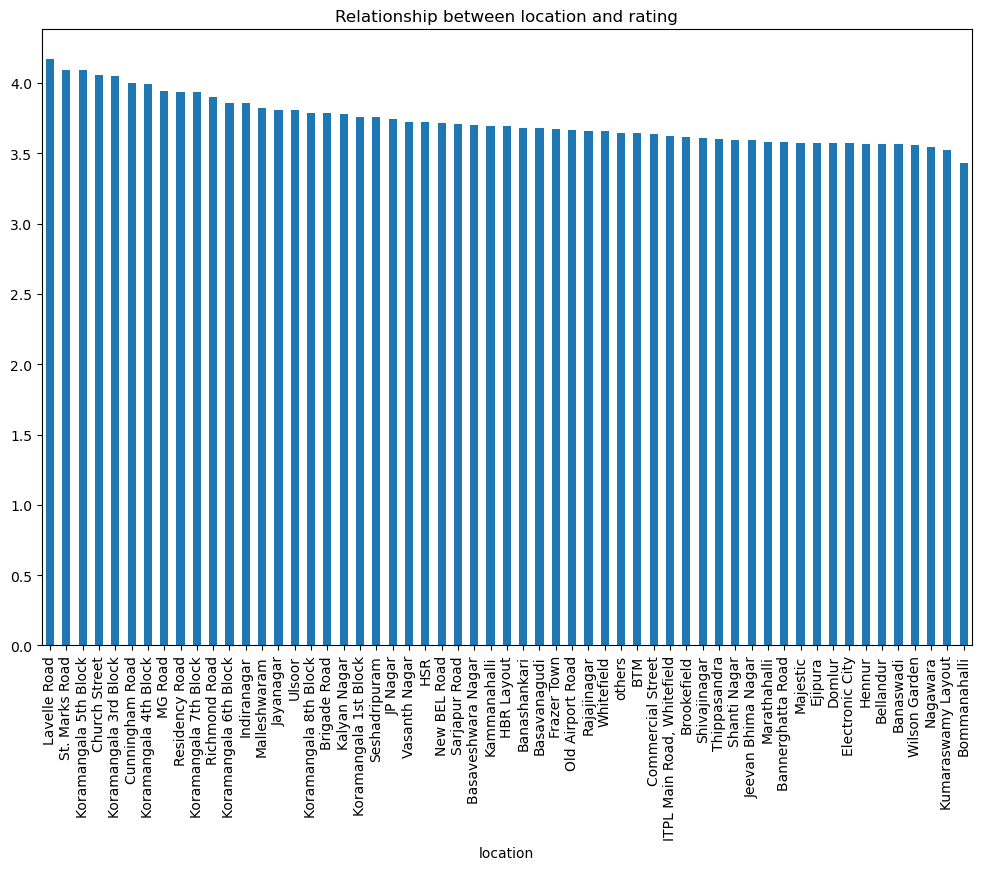

In [57]:
df.rate=df.rate.astype(float)
df3=df.groupby('location')['rate'].mean().sort_values(ascending=False)
df3.plot(kind='bar',figsize=(12,8),title='Relationship between location and rating')

<Axes: title={'center': 'Restraurant Type'}>

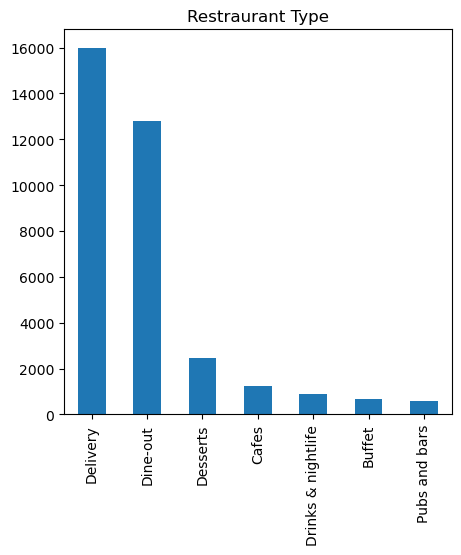

In [58]:
df.Type.value_counts().plot(kind='bar',figsize=(5,5),title='Restraurant Type')

In [59]:
df.rest_type.value_counts()
df.loc[df.rest_type.isin(df.rest_type.value_counts()[df.rest_type.value_counts()<100].index),'rest_type']='others'

<Axes: >

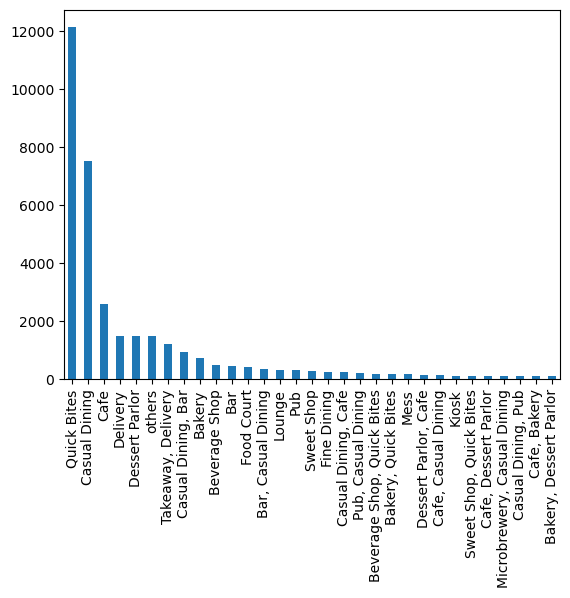

In [60]:
df.rest_type.value_counts().plot(kind='bar')

<Axes: xlabel='online_order'>

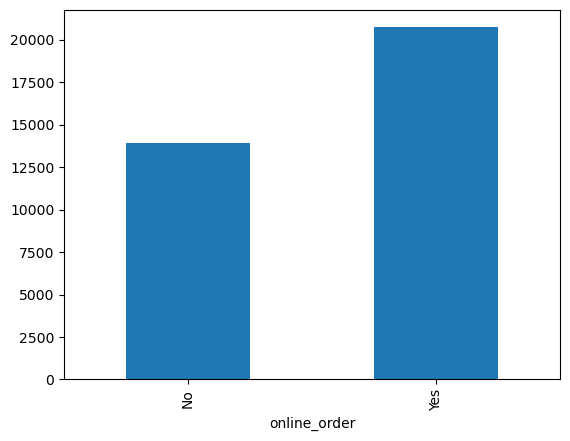

In [61]:
online_order=df.groupby('online_order')['name'].count().sort_values()
online_order.plot(kind='bar')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34636 non-null  object 
 1   online_order  34636 non-null  object 
 2   book_table    34636 non-null  object 
 3   rate          33316 non-null  float64
 4   votes         34636 non-null  int64  
 5   location      34636 non-null  object 
 6   rest_type     34636 non-null  object 
 7   cuisines      34636 non-null  object 
 8   cost2plate    34636 non-null  float64
 9   Type          34636 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


<Axes: title={'center': 'Gaussian rest type and rating'}, ylabel='Density'>

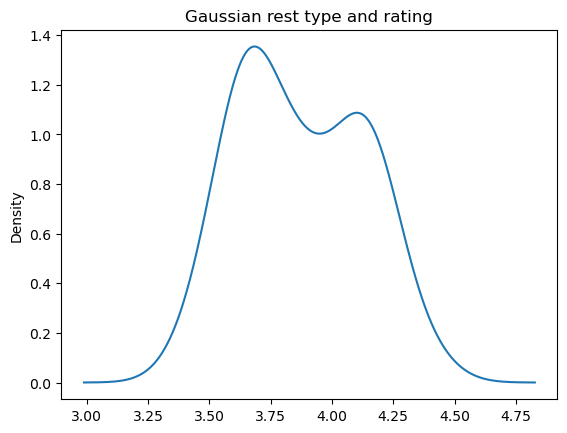

In [63]:
df.groupby('rest_type')['rate'].mean().sort_values(ascending=False).plot(kind='kde',title='Gaussian rest type and rating')

<Axes: title={'center': 'Types of services'}, xlabel='rest_type'>

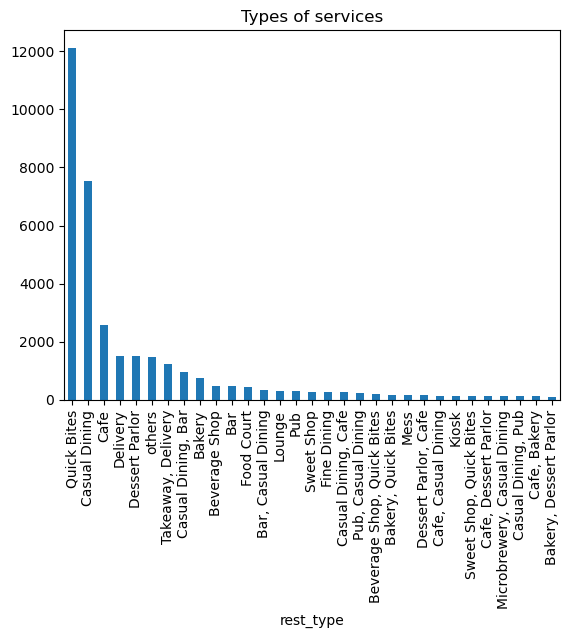

In [64]:
df.groupby('rest_type')['name'].count().sort_values(ascending=False).plot(kind='bar',title='Types of services')

In [65]:
df.cost2plate

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost2plate, Length: 34636, dtype: float64

<Axes: title={'center': 'Cost of restraurant'}, xlabel='name'>

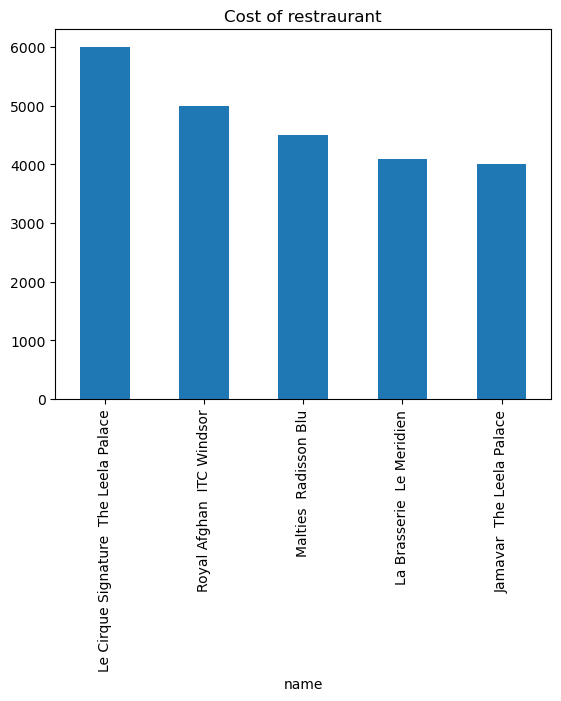

In [66]:
df.groupby('name')['cost2plate'].mean().sort_values().nlargest(5).plot(kind='bar',title='Cost of restraurant')

The restaurant "Le Cirque Signature - The Leela Palace" has the highest cost.

In [67]:
df.groupby('rest_type')['cost2plate'].mean()

rest_type
Bakery                          376.467391
Bakery, Dessert Parlor          367.000000
Bakery, Quick Bites             395.402299
Bar                            1261.416490
Bar, Casual Dining             1382.954545
Beverage Shop                   229.527721
Beverage Shop, Quick Bites      276.439791
Cafe                            633.882855
Cafe, Bakery                    613.025210
Cafe, Casual Dining             838.235294
Cafe, Dessert Parlor            686.178862
Casual Dining                   801.699190
Casual Dining, Bar             1266.491043
Casual Dining, Cafe             910.200000
Casual Dining, Pub             1321.666667
Delivery                        442.183089
Dessert Parlor                  337.209926
Dessert Parlor, Cafe            545.578231
Fine Dining                    2701.498127
Food Court                      444.622642
Kiosk                           249.606299
Lounge                         1685.416667
Mess                            271.387283
M

<Axes: title={'center': 'No. of restaurants in a location'}, xlabel='location'>

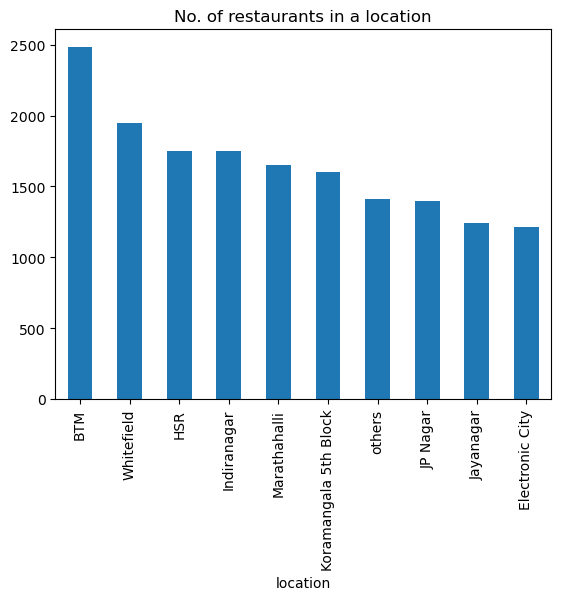

In [68]:
df.groupby('location')['name'].count().nlargest(10).plot(kind='bar',title='No. of restaurants in a location')

<Axes: title={'center': 'Relationship between Rest type and rating'}, xlabel='rest_type'>

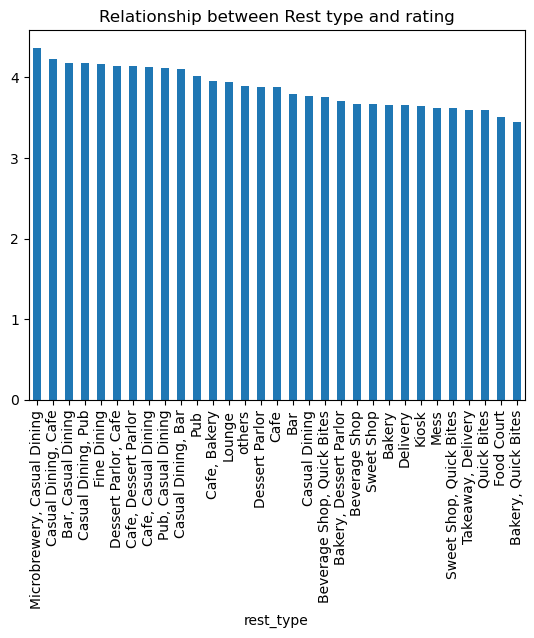

In [69]:
df.groupby('rest_type')['rate'].mean().sort_values(ascending=False).plot(kind='bar',title='Relationship between Rest type and rating')

Microbrrewery Restaurants are most rated

<Axes: title={'center': 'Most famous restaurant chains in Bengaluru'}, xlabel='name'>

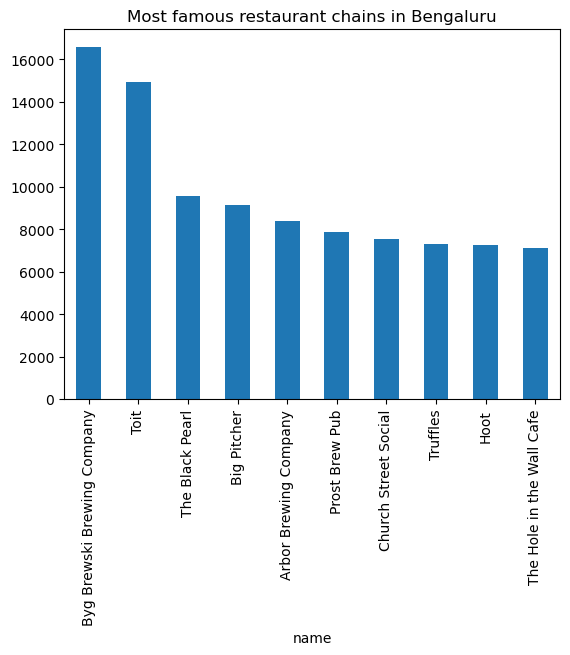

In [70]:
df.groupby('name')['votes'].mean().nlargest(10).plot(kind='bar',title='Most famous restaurant chains in Bengaluru')

Most Famous Retaurant in bengaluru is 'Byg Brewaski Brewing Company'

# Visualising Top cuisines 

In [71]:
rel1=df.groupby('cuisines')['votes'].mean().sort_values(ascending=False).nlargest(10)
px.bar(rel1,title='Top rated cuisines')

In [72]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'others', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery, Dessert Parlor', 'Pub', 'Bakery',
       'Takeaway, Delivery', 'Fine Dining', 'Beverage Shop', 'Sweet Shop',
       'Bar', 'Beverage Shop, Quick Bites', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery',
       'Casual Dining, Pub', 'Cafe, Dessert Parlor',
       'Dessert Parlor, Cafe'], dtype=object)

In [73]:
df.rest_type=df.rest_type.apply(lambda x:x.split(','))

In [74]:
df=df.explode('rest_type')
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,"Cafe, Mexican, Italian",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Casual Dining,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51713,Vinod Bar And Restaurant,No,No,3.8,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.8,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,"Finger Food, North Indian, Continental",1500.0,Pubs and bars


<Axes: xlabel='name'>

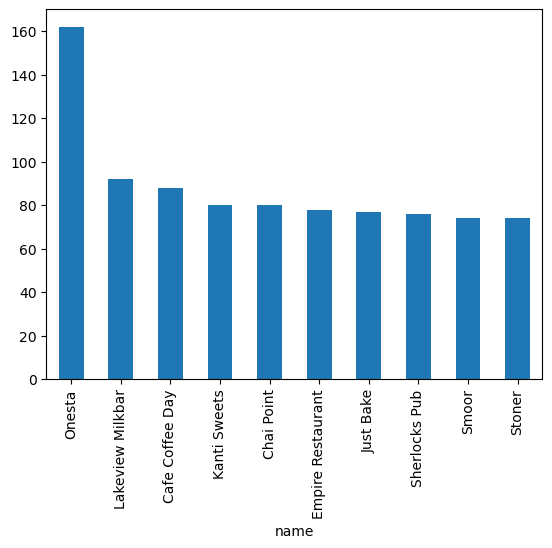

In [75]:
df.groupby('name')['rest_type'].count().sort_values(ascending=False).nlargest(10).plot(kind='bar')

In [76]:
qq=df.groupby('name')['rest_type'].count().sort_values(ascending=False).nlargest(10)
px.bar(qq,color_discrete_sequence =['green']*len(df))

In [77]:
df.cuisines=df.cuisines.apply(lambda x:x.split(','))

In [78]:
df=df.explode('cuisines')
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800.0,Buffet
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,800.0,Buffet
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,800.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,1500.0,Pubs and bars
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,1500.0,Pubs and bars
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,1500.0,Pubs and bars
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,1500.0,Pubs and bars


In [79]:
sca=df.groupby('location')['name'].count()
px.scatter(sca)

In [80]:
x=df.groupby('name')['rate'].mean().nlargest(10)
y=df.groupby('name')['cost2plate'].mean().nlargest(10)
z=df.groupby('name')['votes'].mean().nlargest(10)

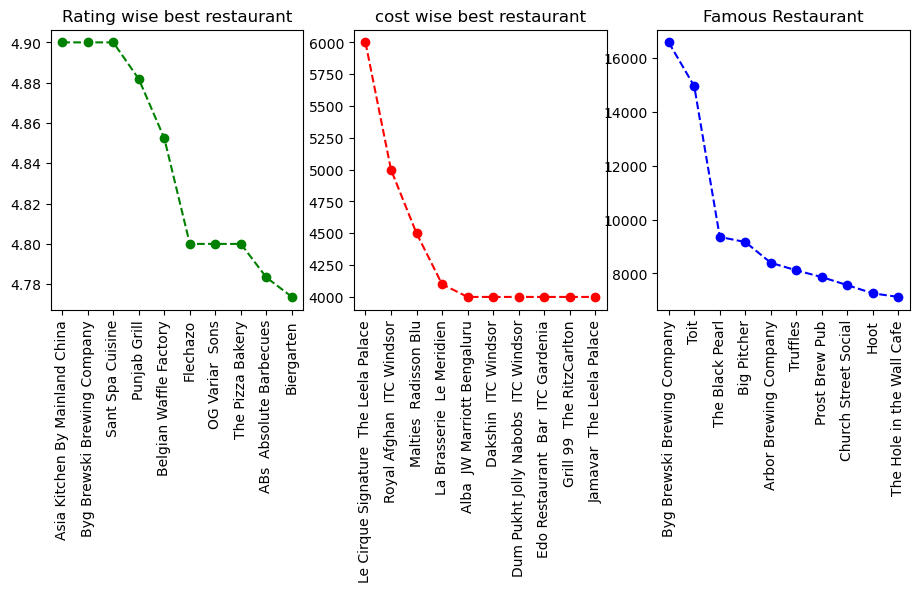

In [81]:
plt.figure(figsize=(15,8))

plt.subplot(2,4,1)
plt.plot(x,'go--')
plt.title('Rating wise best restaurant')
plt.xticks(rotation=90)

plt.subplot(2,4,2)
plt.plot(y,'ro--')
plt.title('cost wise best restaurant')
plt.xticks(rotation=90)

plt.subplot(2,4,3)
plt.plot(z,'bo--')
plt.title('Famous Restaurant')
plt.xticks(rotation=90)

plt.show()

In [82]:
df[df['rate']==4.9]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,Type
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,Continental,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,North Indian,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,Italian,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,South Indian,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,Finger Food,1600.0,Delivery
...,...,...,...,...,...,...,...,...,...,...
50059,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,others,Finger Food,1600.0,Drinks & nightlife
51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,Asian,1400.0,Dine-out
51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,Mediterranean,1400.0,Dine-out
51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,North Indian,1400.0,Dine-out


In [83]:
df.groupby('name')['rate'].max().nlargest(10)

name
ABs  Absolute Barbecues           4.9
Asia Kitchen By Mainland China    4.9
Belgian Waffle Factory            4.9
Byg Brewski Brewing Company       4.9
Flechazo                          4.9
Milano Ice Cream                  4.9
Punjab Grill                      4.9
Sant Spa Cuisine                  4.9
Barbecue by Punjab Grill          4.8
Barbeque Nation                   4.8
Name: rate, dtype: float64

In [84]:
df.loc[df[df['rate']==4.9].index]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,Type
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,Continental,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,North Indian,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,Italian,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,South Indian,1600.0,Delivery
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,others,Finger Food,1600.0,Delivery
...,...,...,...,...,...,...,...,...,...,...
51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,BBQ,1400.0,Dine-out
51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,Asian,1400.0,Dine-out
51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,Mediterranean,1400.0,Dine-out
51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,North Indian,1400.0,Dine-out


In [85]:
x1=df.groupby('location')['cost2plate'].mean().sort_values(ascending=False).head(10)
x2=df.groupby('location')['cost2plate'].mean().sort_values(ascending=False).tail(10)

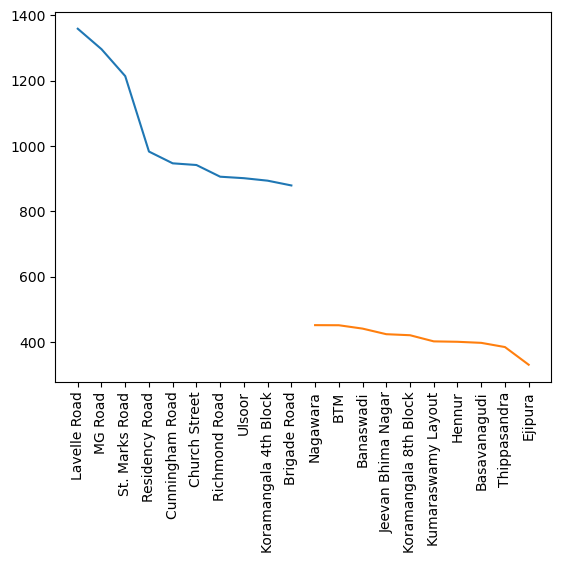

In [86]:
plt.plot(x1)
plt.plot(x2)
plt.xticks(rotation=90)
plt.show()

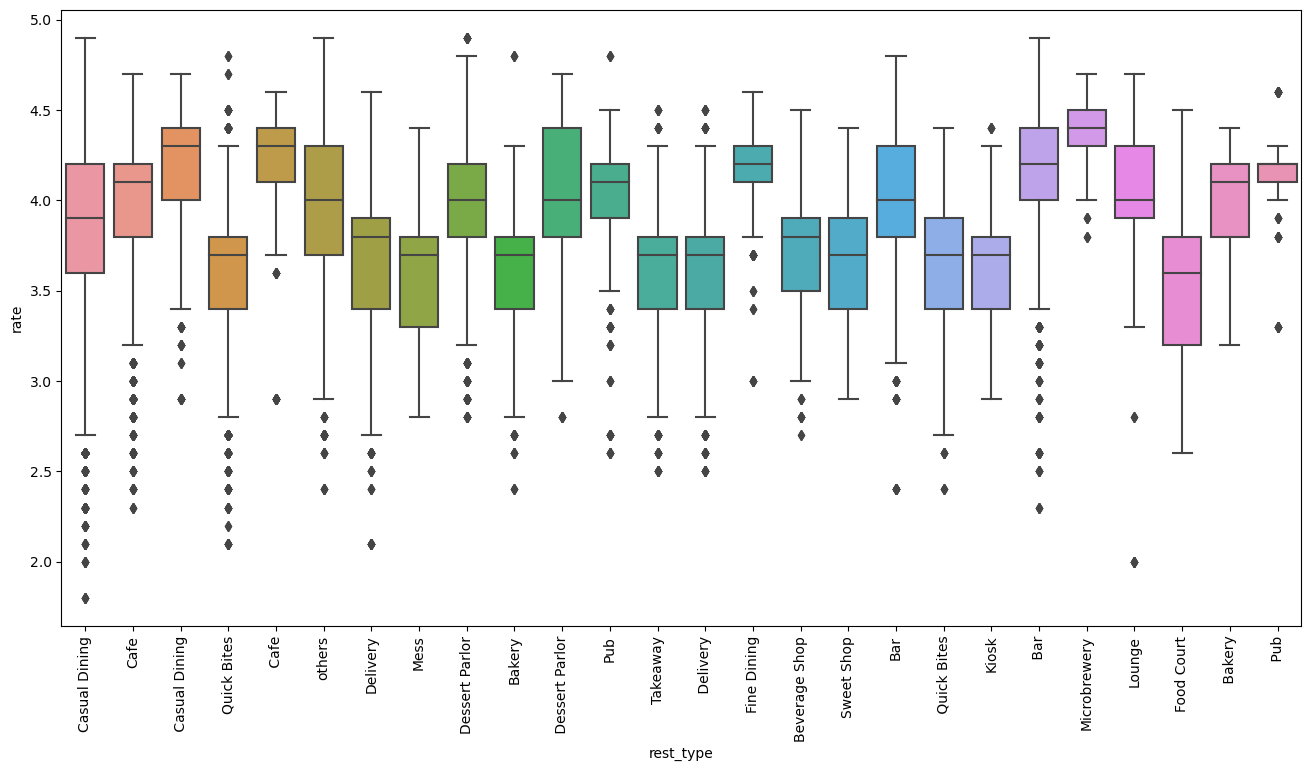

In [87]:
plt.figure(figsize=(16,8))
sns.boxplot(x='rest_type',y='rate',data=df)
plt.xticks(rotation=90)
plt.show()

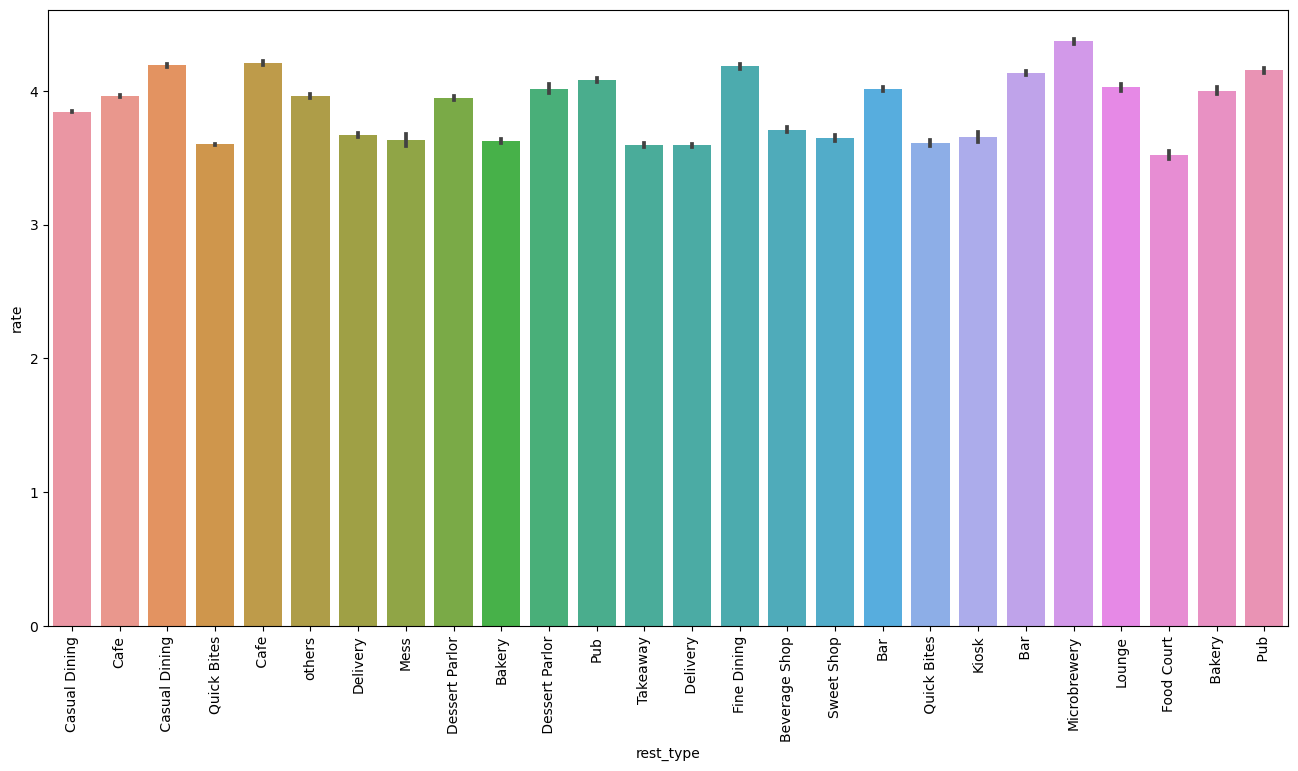

In [88]:
plt.figure(figsize=(16,8))
sns.barplot(x='rest_type',y='rate',data=df)
plt.xticks(rotation=90)
plt.show()

In [89]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800.0,Buffet
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,800.0,Buffet
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,800.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,1500.0,Pubs and bars
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,1500.0,Pubs and bars
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,1500.0,Pubs and bars
51716,The Nest The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,1500.0,Pubs and bars


In [90]:
df.location.value_counts()

BTM                           6506
Koramangala 5th Block         6063
Indiranagar                   5676
Whitefield                    5370
HSR                           5295
Marathahalli                  4494
others                        4113
JP Nagar                      4094
Jayanagar                     3565
Electronic City               3449
Bellandur                     3023
Sarjapur Road                 2934
Bannerghatta Road             2691
Koramangala 4th Block         2049
Brigade Road                  1998
MG Road                       1997
Koramangala 7th Block         1930
Ulsoor                        1781
Koramangala 6th Block         1770
Kalyan Nagar                  1699
Church Street                 1683
Brookefield                   1650
New BEL Road                  1600
Lavelle Road                  1508
Koramangala 1st Block         1471
Banashankari                  1433
Malleshwaram                  1368
Residency Road                1330
Rajajinagar         

In [91]:
df.loc[(df['location']=='BTM')&(df['rate']>4.8),'name']

8260     ABs  Absolute Barbecues
8260     ABs  Absolute Barbecues
8260     ABs  Absolute Barbecues
8260     ABs  Absolute Barbecues
10389    ABs  Absolute Barbecues
10389    ABs  Absolute Barbecues
10389    ABs  Absolute Barbecues
10389    ABs  Absolute Barbecues
19393    ABs  Absolute Barbecues
19393    ABs  Absolute Barbecues
19393    ABs  Absolute Barbecues
19393    ABs  Absolute Barbecues
21279    ABs  Absolute Barbecues
21279    ABs  Absolute Barbecues
21279    ABs  Absolute Barbecues
21279    ABs  Absolute Barbecues
23587    ABs  Absolute Barbecues
23587    ABs  Absolute Barbecues
23587    ABs  Absolute Barbecues
23587    ABs  Absolute Barbecues
37099    ABs  Absolute Barbecues
37099    ABs  Absolute Barbecues
37099    ABs  Absolute Barbecues
37099    ABs  Absolute Barbecues
Name: name, dtype: object